This method segments grayscale images based on histogram values.


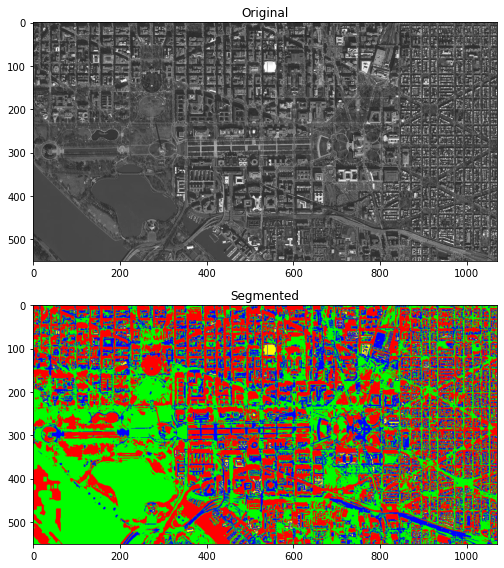

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float, img_as_ubyte, io
from skimage.restoration import denoise_nl_means, estimate_sigma

patch_kw = dict(patch_size=5,     # 5x5 patches
                patch_distance=6, # 13x13 search area
                multichannel=True)

image = img_as_float(io.imread("./data/bird_view.jpg", as_gray=True))
sigma_est = np.mean(estimate_sigma(image, multichannel=True))

denoise = denoise_nl_means(image, h=1.15 * sigma_est, fast_mode=True, **patch_kw)
denoise_ubyte = img_as_ubyte(denoise)

# plt.hist(denoise_ubyte.flat, bins=100, range=(0, 255))

segm1 = (denoise_ubyte <= 80)
segm2 = (denoise_ubyte > 80) & (denoise_ubyte <= 110)
segm3 = (denoise_ubyte > 110) & (denoise_ubyte <= 210)
segm4 = (denoise_ubyte > 210)

all_segments = np.zeros((denoise_ubyte.shape[0], denoise_ubyte.shape[1], 3))

all_segments[segm1] = (1, 0, 0)
all_segments[segm2] = (0, 1, 0)
all_segments[segm3] = (0, 0, 1)
all_segments[segm4] = (1, 1, 0)

fig, axes = plt.subplots(2, 1, figsize=(8,8))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(all_segments)
ax[1].set_title('Segmented')
#
plt.tight_layout()